In [1]:

import numpy as np
import os
import cv2
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#import shutil
from glob import glob
# Helper libraries
import matplotlib.pyplot as plt
#import math
%matplotlib inline
#print(tf.__version__)

In [2]:
data_root='C:/Users/Livankumar/Desktop/DataSet/train'
path_disease_image = os.path.join('C:/Users/Livankumar/Desktop/DataSet/train/Diabtic in retina')
path_Healthy_image = os.path.join('C:/Users/Livankumar/Desktop/DataSet/train/Normal')

In [3]:
# jpg and png files
disease_images_ls = glob(os.path.join(path_disease_image,"*.jpg"))

Healthy_images_ls = glob(os.path.join(path_Healthy_image,"*.jpg"))
Healthy_images_ls.extend(glob(os.path.join(path_Healthy_image,"*.jpg")))
len(disease_images_ls)
len(Healthy_images_ls)

2000

In [4]:
disease = {'class': 'Diabtic in retina',
         'path': path_disease_image,
         'images': disease_images_ls}

healthy = {'class': 'Normal',
             'path': path_Healthy_image,
             'images': Healthy_images_ls}

In [5]:
total_disease_image = len(disease_images_ls)
total_healthy_image = len(Healthy_images_ls)
print("Total path_disease_image: {}".format(total_disease_image))
print("Total path_healthy_image: {}".format(total_healthy_image))

Total path_disease_image: 11
Total path_healthy_image: 2000


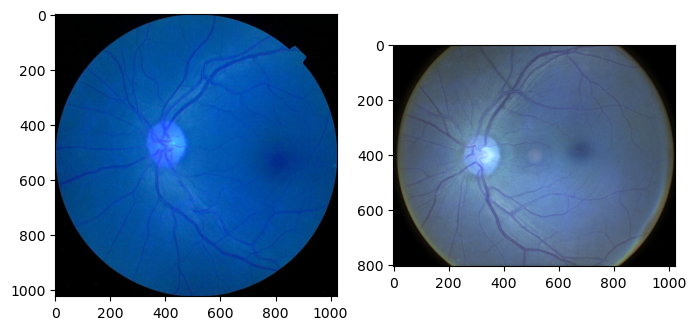

In [6]:
image_disease = cv2.imread(os.path.join(disease_images_ls[1]))
image_Healthy = cv2.imread(os.path.join(Healthy_images_ls[5]))
operatedImage = cv2.cvtColor(image_Healthy, cv2.COLOR_BGR2GRAY)

# modify the data type
# setting to 32-bit floating point
operatedImage = np.float32(operatedImage)
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07)

f = plt.figure(figsize=(8, 8))
f.add_subplot(1, 2, 1)
plt.imshow(image_Healthy)
f.add_subplot(1,2, 2)
plt.imshow(image_disease)

In [7]:
print("Image disease Shape {}".format(image_Healthy.shape))
print("Image healthy Shape {}".format(image_Healthy.shape))

Image disease Shape (1024, 1024, 3)
Image healthy Shape (1024, 1024, 3)


In [8]:
total_train_disease = len(os.listdir('C:/Users/Livankumar/Desktop/DataSet/train/Diabtic in retina'))
total_train_Healthy = len(os.listdir('C:/Users/Livankumar/Desktop/DataSet/train/Normal'))
total_test_disease = len(os.listdir('C:/Users/Livankumar/Desktop/DataSet/test/Diabtic in retina'))
total_test_Healthy = len(os.listdir('C:/Users/Livankumar/Desktop/DataSet/test/Normal'))

print("Train sets images disease: {}".format(total_train_disease))
print("Train sets images healthy: {}".format(total_train_Healthy))
print("Test sets images disease: {}".format(total_test_disease))
print("Test sets images healthy: {}".format(total_test_Healthy))

Train sets images disease: 11
Train sets images healthy: 1000
Test sets images disease: 11
Test sets images healthy: 1000


In [9]:
batch_size =15
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:

train_dir = os.path.join('C:/Users/Livankumar/Desktop/DataSet/train')
test_dir = os.path.join('C:/Users/Livankumar/Desktop/DataSet/test')


total_train = total_train_Healthy+ total_train_disease
total_test = total_test_Healthy + total_test_disease

In [12]:
train_data_gen = train_datagen.flow_from_directory(batch_size=batch_size,
                                                   directory=train_dir,
                                                   shuffle=True,
                                                   target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                   class_mode='binary')

Found 1011 images belonging to 2 classes.


In [13]:
test_data_gen = test_datagen.flow_from_directory(batch_size=batch_size,
                                                 directory=test_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1011 images belonging to 2 classes.


In [14]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [15]:
cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# CNN vgg and resnet hybrid model

In [16]:

##VGG model
#import split_folders

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import metrics

from sklearn.utils import class_weight
from collections import Counter
vggmodel = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(2, 2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)

])
vggmodel.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

import matplotlib.pyplot as plt

import os
from os import listdir
from os.path import isfile, join


In [17]:
####resnet
ResNet_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

In [18]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in vggmodel.layers:
    layer.trainable = False

for layer in vggmodel.layers[-16:]:
    layer.trainable = True
    print("Layer '%s' is trainable" % layer.name)
checkpoint = ModelCheckpoint("vgg16_disease.h5", monitor='val_accuracy', verbose=1,
                             saave_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
for layer in ResNet_model.layers[:-15]:
    layer.trainable = False
x=vggmodel.output
x = ResNet_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(1, activation='softmax')(x)
model3 = Model(ResNet_model.input, output)


model3.summary()


Layer 'conv2d_2' is trainable
Layer 'max_pooling2d_2' is trainable
Layer 'conv2d_3' is trainable
Layer 'max_pooling2d_3' is trainable
Layer 'conv2d_4' is trainable
Layer 'max_pooling2d_4' is trainable
Layer 'flatten_1' is trainable
Layer 'dense_2' is trainable
Layer 'dense_3' is trainable
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
  

                                                                     'conv2_block2_3_conv[0][0]'] 
                                                                                                  
 conv2_block3_preact_bn (Ba  (None, 38, 38, 256)          1024      ['conv2_block2_out[0][0]']    
 tchNormalization)                                                                                
                                                                                                  
 conv2_block3_preact_relu (  (None, 38, 38, 256)          0         ['conv2_block3_preact_bn[0][0]
 Activation)                                                        ']                            
                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 38, 38, 64)           16384     ['conv2_block3_preact_relu[0][
 D)                                                                 0]']                          
          

 conv3_block2_1_bn (BatchNo  (None, 19, 19, 128)          512       ['conv3_block2_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_1_relu (Activ  (None, 19, 19, 128)          0         ['conv3_block2_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block2_2_pad (ZeroPa  (None, 21, 21, 128)          0         ['conv3_block2_1_relu[0][0]'] 
 dding2D)                                                                                         
                                                                                                  
 conv3_block2_2_conv (Conv2  (None, 19, 19, 128)          147456    ['conv3_block2_2_pad[0][0]']  
 D)       

                                                                                                  
 conv3_block4_3_conv (Conv2  (None, 19, 19, 512)          66048     ['conv3_block4_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block4_out (Add)      (None, 19, 19, 512)          0         ['conv3_block3_out[0][0]',    
                                                                     'conv3_block4_3_conv[0][0]'] 
                                                                                                  
 conv3_block5_preact_bn (Ba  (None, 19, 19, 512)          2048      ['conv3_block4_out[0][0]']    
 tchNormalization)                                                                                
                                                                                                  
 conv3_blo

 rmalization)                                                                                     
                                                                                                  
 conv3_block7_1_relu (Activ  (None, 19, 19, 128)          0         ['conv3_block7_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block7_2_pad (ZeroPa  (None, 21, 21, 128)          0         ['conv3_block7_1_relu[0][0]'] 
 dding2D)                                                                                         
                                                                                                  
 conv3_block7_2_conv (Conv2  (None, 19, 19, 128)          147456    ['conv3_block7_2_pad[0][0]']  
 D)                                                                                               
          

 conv4_block1_2_relu (Activ  (None, 10, 10, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 10, 10, 1024)         525312    ['conv4_block1_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv4_block1_3_conv (Conv2  (None, 10, 10, 1024)         263168    ['conv4_block1_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_out (Add)      (None, 10, 10, 1024)         0         ['conv4_block1_0_conv[0][0]', 
          

                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 10, 10, 256)          262144    ['conv4_block4_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 10, 10, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block4_1_relu (Activ  (None, 10, 10, 256)          0         ['conv4_block4_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_blo

 rmalization)                                                                                     
                                                                                                  
 conv4_block6_2_relu (Activ  (None, 10, 10, 256)          0         ['conv4_block6_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block6_3_conv (Conv2  (None, 10, 10, 1024)         263168    ['conv4_block6_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block6_out (Add)      (None, 10, 10, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_conv[0][0]'] 
          

 conv4_block9_1_conv (Conv2  (None, 10, 10, 256)          262144    ['conv4_block9_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv4_block9_1_bn (BatchNo  (None, 10, 10, 256)          1024      ['conv4_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_1_relu (Activ  (None, 10, 10, 256)          0         ['conv4_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block9_2_pad (ZeroPa  (None, 12, 12, 256)          0         ['conv4_block9_1_relu[0][0]'] 
 dding2D) 

                                                                                                  
 conv4_block11_2_relu (Acti  (None, 10, 10, 256)          0         ['conv4_block11_2_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block11_3_conv (Conv  (None, 10, 10, 1024)         263168    ['conv4_block11_2_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block11_out (Add)     (None, 10, 10, 1024)         0         ['conv4_block10_out[0][0]',   
                                                                     'conv4_block11_3_conv[0][0]']
                                                                                                  
 conv4_blo

 2D)                                                                [0]']                         
                                                                                                  
 conv4_block14_1_bn (BatchN  (None, 10, 10, 256)          1024      ['conv4_block14_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block14_1_relu (Acti  (None, 10, 10, 256)          0         ['conv4_block14_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block14_2_pad (ZeroP  (None, 12, 12, 256)          0         ['conv4_block14_1_relu[0][0]']
 adding2D)                                                                                        
          

 conv4_block16_2_relu (Acti  (None, 10, 10, 256)          0         ['conv4_block16_2_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block16_3_conv (Conv  (None, 10, 10, 1024)         263168    ['conv4_block16_2_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_out (Add)     (None, 10, 10, 1024)         0         ['conv4_block15_out[0][0]',   
                                                                     'conv4_block16_3_conv[0][0]']
                                                                                                  
 conv4_block17_preact_bn (B  (None, 10, 10, 1024)         4096      ['conv4_block16_out[0][0]']   
 atchNorma

                                                                                                  
 conv4_block19_1_bn (BatchN  (None, 10, 10, 256)          1024      ['conv4_block19_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block19_1_relu (Acti  (None, 10, 10, 256)          0         ['conv4_block19_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block19_2_pad (ZeroP  (None, 12, 12, 256)          0         ['conv4_block19_1_relu[0][0]']
 adding2D)                                                                                        
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block21_3_conv (Conv  (None, 10, 10, 1024)         263168    ['conv4_block21_2_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block21_out (Add)     (None, 10, 10, 1024)         0         ['conv4_block20_out[0][0]',   
                                                                     'conv4_block21_3_conv[0][0]']
                                                                                                  
 conv4_block22_preact_bn (B  (None, 10, 10, 1024)         4096      ['conv4_block21_out[0][0]']   
 atchNormalization)                                                                               
          

 conv4_block24_1_bn (BatchN  (None, 10, 10, 256)          1024      ['conv4_block24_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block24_1_relu (Acti  (None, 10, 10, 256)          0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_pad (ZeroP  (None, 12, 12, 256)          0         ['conv4_block24_1_relu[0][0]']
 adding2D)                                                                                        
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 10, 10, 256)          589824    ['conv4_block24_2_pad[0][0]'] 
 2D)      

                                                                                                  
 conv4_block26_3_conv (Conv  (None, 10, 10, 1024)         263168    ['conv4_block26_2_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block26_out (Add)     (None, 10, 10, 1024)         0         ['conv4_block25_out[0][0]',   
                                                                     'conv4_block26_3_conv[0][0]']
                                                                                                  
 conv4_block27_preact_bn (B  (None, 10, 10, 1024)         4096      ['conv4_block26_out[0][0]']   
 atchNormalization)                                                                               
                                                                                                  
 conv4_blo

 ormalization)                                                                                    
                                                                                                  
 conv4_block29_1_relu (Acti  (None, 10, 10, 256)          0         ['conv4_block29_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block29_2_pad (ZeroP  (None, 12, 12, 256)          0         ['conv4_block29_1_relu[0][0]']
 adding2D)                                                                                        
                                                                                                  
 conv4_block29_2_conv (Conv  (None, 10, 10, 256)          589824    ['conv4_block29_2_pad[0][0]'] 
 2D)                                                                                              
          

 conv4_block31_3_conv (Conv  (None, 10, 10, 1024)         263168    ['conv4_block31_2_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block31_out (Add)     (None, 10, 10, 1024)         0         ['conv4_block30_out[0][0]',   
                                                                     'conv4_block31_3_conv[0][0]']
                                                                                                  
 conv4_block32_preact_bn (B  (None, 10, 10, 1024)         4096      ['conv4_block31_out[0][0]']   
 atchNormalization)                                                                               
                                                                                                  
 conv4_block32_preact_relu   (None, 10, 10, 1024)         0         ['conv4_block32_preact_bn[0][0
 (Activati

                                                                                                  
 conv4_block34_1_relu (Acti  (None, 10, 10, 256)          0         ['conv4_block34_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block34_2_pad (ZeroP  (None, 12, 12, 256)          0         ['conv4_block34_1_relu[0][0]']
 adding2D)                                                                                        
                                                                                                  
 conv4_block34_2_conv (Conv  (None, 10, 10, 256)          589824    ['conv4_block34_2_pad[0][0]'] 
 2D)                                                                                              
                                                                                                  
 conv4_blo

 g2D)                                                                                             
                                                                                                  
 conv4_block36_3_conv (Conv  (None, 5, 5, 1024)           263168    ['conv4_block36_2_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block36_out (Add)     (None, 5, 5, 1024)           0         ['max_pooling2d_7[0][0]',     
                                                                     'conv4_block36_3_conv[0][0]']
                                                                                                  
 conv5_block1_preact_bn (Ba  (None, 5, 5, 1024)           4096      ['conv4_block36_out[0][0]']   
 tchNormalization)                                                                                
          

 conv5_block3_1_conv (Conv2  (None, 5, 5, 512)            1048576   ['conv5_block3_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv5_block3_1_bn (BatchNo  (None, 5, 5, 512)            2048      ['conv5_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_1_relu (Activ  (None, 5, 5, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_pad (ZeroPa  (None, 7, 7, 512)            0         ['conv5_block3_1_relu[0][0]'] 
 dding2D) 

In [19]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.002)
model3.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy',])

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

epochs = 5


# Define the hybrid model architecture
base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers except the last classification layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
# Train the model
history = model.fit(train_data_gen,
                    epochs=epochs,
                    validation_data=test_data_gen)

# Access training accuracy from history



Epoch 1/5


68/68 [==============================] - 280s 4s/step - loss: 0.1541 - accuracy: 0.9852 - val_loss: 0.0441 - val_accuracy: 0.9891
Epoch 2/5
68/68 [==============================] - 217s 3s/step - loss: 0.0420 - accuracy: 0.9901 - val_loss: 0.0171 - val_accuracy: 0.9921
Epoch 3/5
68/68 [==============================] - 145s 2s/step - loss: 0.0311 - accuracy: 0.9901 - val_loss: 0.0126 - val_accuracy: 0.9960
Epoch 4/5
68/68 [==============================] - 128s 2s/step - loss: 0.0353 - accuracy: 0.9891 - val_loss: 0.0083 - val_accuracy: 0.9980
Epoch 5/5
68/68 [==============================] - 127s 2s/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.0069 - val_accuracy: 0.9960


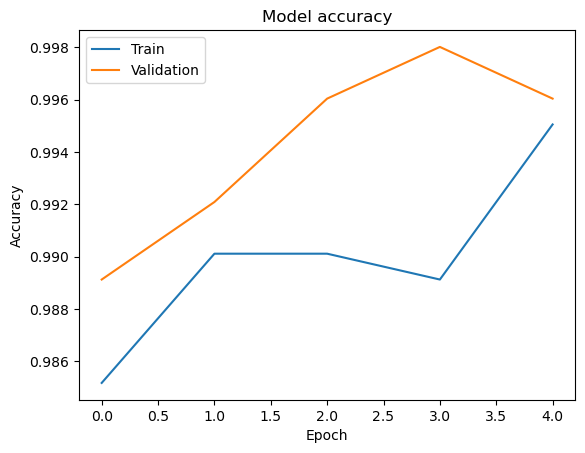

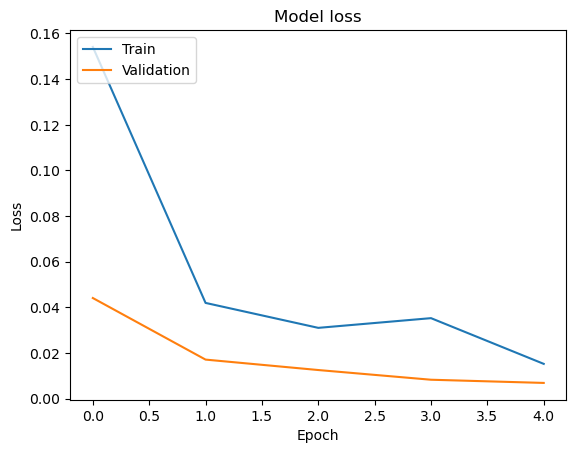

68/68 [==============================] - 65s 924ms/step
Accuracy: 99.51%
Sensitivity (Recall): 0.99
Precision: 0.99
F1 Score: 0.99


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Make predictions on test set
predictions = model.predict(test_data_gen)
predicted_classes = (predictions > 0.5).astype(int)
true_classes = test_data_gen.classes

# Calculate evaluation metrics
accuracy = accuracy_score(true_classes, predicted_classes)
conf_mat = confusion_matrix(true_classes, predicted_classes)
tn, fp, fn, tp = conf_mat.ravel()

# Handling for division by zero scenario
# specificity = tn / (tn + fp) if (tn + fp) != 0 else 0.0
sensitivity = tp / (tp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print evaluation metrics
training_accuracy = history.history['accuracy'][-1]
print("Accuracy: {:.2f}%".format(training_accuracy * 100))
# print("Specificity: {:.2f}".format(specificity))
print("Sensitivity (Recall): {:.2f}".format(sensitivity))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1_score))


In [ ]:
predictions = model.predict(test_data_gen, steps=test_data_gen.samples // batch_size)

# Convert probabilities to class labels based on the threshold
class_labels = ['Normal', 'Diabetic Retinopathy']

for idx, pred in enumerate(predictions):
    if pred >= 0.5:
        print(f"Image {idx+1}. Predicted: Diabetic Retinopathy")
    else:
        print(f"Image {idx+1}. Predicted: Normal")